# ЛР 1
## Задания:
1. Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).
2. Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', index_col=0)  

In [6]:
df

,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
AccountAge,,,,,,,,,,,,,,,,,,,,
20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,12.041577,216.748394,Standard,Bank transfer,No,Both,No,Mobile,15.720485,123.854169,29,Sci-Fi,3.960361,4,Female,18,Yes,No,NKNHL3SRNX,0
57,10.104155,575.936861,Basic,Credit card,Yes,Both,Yes,TV,23.795246,161.325894,42,Comedy,3.910286,2,Male,22,No,Yes,24794SG5S1,0
56,12.205436,683.504390,Premium,Credit card,No,TV Shows,Yes,Mobile,1.332610,140.223702,45,Fantasy,4.571555,1,Male,4,Yes,Yes,VYGN9JRW4P,0


Замена текстовых категориальных признаков на числовые

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['SubscriptionType'] = labelencoder.fit_transform(df['SubscriptionType'])
df['PaymentMethod'] =  labelencoder.fit_transform(df['PaymentMethod'])
df['PaperlessBilling'] =  labelencoder.fit_transform(df['PaperlessBilling'])
df['ContentType'] =  labelencoder.fit_transform(df['ContentType'])
df['MultiDeviceAccess'] =  labelencoder.fit_transform(df['MultiDeviceAccess'])
df['DeviceRegistered'] =  labelencoder.fit_transform(df['DeviceRegistered'])
df['GenrePreference'] =  labelencoder.fit_transform(df['GenrePreference'])
df['Gender'] =  labelencoder.fit_transform(df['Gender'])
df['ParentalControl'] =  labelencoder.fit_transform(df['ParentalControl'])
df['SubtitlesEnabled'] =  labelencoder.fit_transform(df['SubtitlesEnabled'])
df['CustomerID'] =  labelencoder.fit_transform(df['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100029 entries, 20 to 77
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MonthlyCharges            100029 non-null  float64
 1   TotalCharges              100029 non-null  float64
 2   SubscriptionType          100029 non-null  int64  
 3   PaymentMethod             100029 non-null  int64  
 4   PaperlessBilling          100029 non-null  int64  
 5   ContentType               100029 non-null  int64  
 6   MultiDeviceAccess         100029 non-null  int64  
 7   DeviceRegistered          100029 non-null  int64  
 8   ViewingHoursPerWeek       100029 non-null  float64
 9   AverageViewingDuration    100029 non-null  float64
 10  ContentDownloadsPerMonth  100029 non-null  int64  
 11  GenrePreference           100029 non-null  int64  
 12  UserRating                100029 non-null  float64
 13  SupportTicketsPerMonth    100029 non-null  int64  
 

Разбиение на train/test и обучение модели с разными параметрами

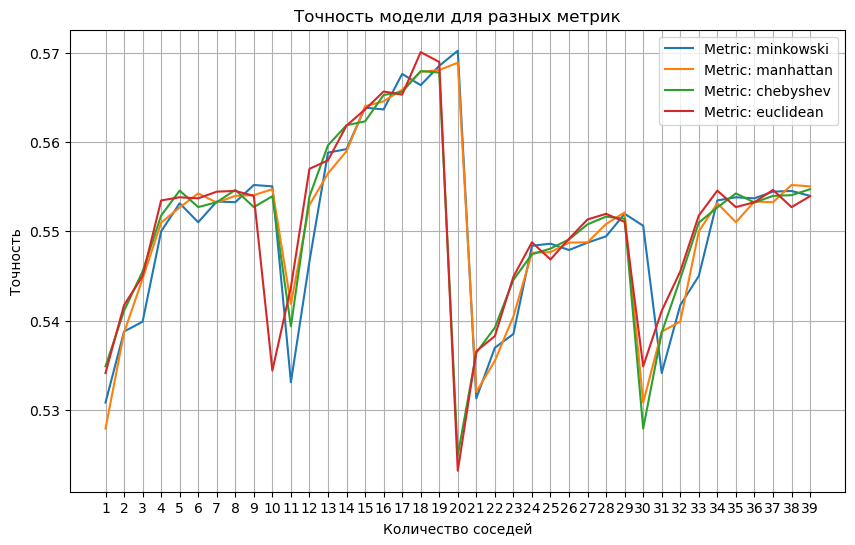

Лучшее кол-во соседей: 38, Лучшая метрика: manhattan


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


X = df.drop(columns=['Churn'])
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)


under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)


knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 40),
              'metric': ['minkowski', 'manhattan', 'chebyshev', 'euclidean']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_resampled, Y_resampled)

best_params = grid_search.best_params_
best_metric = best_params['metric']
best_k = best_params['n_neighbors']

accuracies = grid_search.cv_results_['mean_test_score']
accuracies = np.array(accuracies).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))

plt.figure(figsize=(10, 6))

for i, metric in enumerate(param_grid['metric']):
    plt.plot(param_grid['n_neighbors'], accuracies[:, i], markersize=4,
             label=f'Metric: {metric}')

plt.title('Точность модели для разных метрик')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(range(1, 40))
plt.legend()
plt.grid(True)
plt.show()

print(f"Лучшее кол-во соседей: {best_k}, Лучшая метрика: {best_metric}")

Оценка точности и отчёт о классификации

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_resampled, Y_resampled)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Точность модели: {accuracy}")

report = classification_report(Y_test, Y_pred, zero_division=1)
print(report)

Точность модели: 0.5948882002066047
              precision    recall  f1-score   support

           0       0.85      0.61      0.71     24522
           1       0.23      0.53      0.32      5487

    accuracy                           0.59     30009
   macro avg       0.54      0.57      0.52     30009
weighted avg       0.74      0.59      0.64     30009

